<a href="https://colab.research.google.com/github/Omorusi/LinearRegressation/blob/main/project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
data = pd.read_csv('/content/16-17.csv')
print(data)

    Unnamed: 0         Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5  \
0           Rk             Player        Age       Team        Pos          G   
1            1  Russell Westbrook         28        OKC         PG         81   
2            2       James Harden         27        HOU         PG         81   
3            3      Isaiah Thomas         27        BOS         PG         76   
4            4      Anthony Davis         23        NOP          C         75   
..         ...                ...        ...        ...        ...        ...   
615        483         Ben Bentil         21        DAL         PF          3   
616        484    Patricio Garino         23        ORL         SG          5   
617        485   Danuel House Jr.         23        WAS         SG          1   
618        486        R.J. Hunter         23        CHI         SG          3   
619        NaN     League Average        NaN        NaN        NaN        NaN   

    Unnamed: 6 Unnamed: 7 U

Columns in the dataset:
Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')
Cleaned columns in the dataset:
Index(['Rk', 'Player', 'Age', 'Team', 'Pos', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Awards'],
      dtype='object')
Points (3P):
0    233.0
1     50.0
2     93.0
3    230.0
4     97.0
Name: 3P, dtype: float64
PointsA (3PA):
0    610.0
1    142.0
2    251.0
3    651.0
4    288.0
Name: 3PA, dtype: float64
Linear Regression Coefficient (slope): 0.36716074663091497
Linear Regression Intercept: -1.7349982009301925


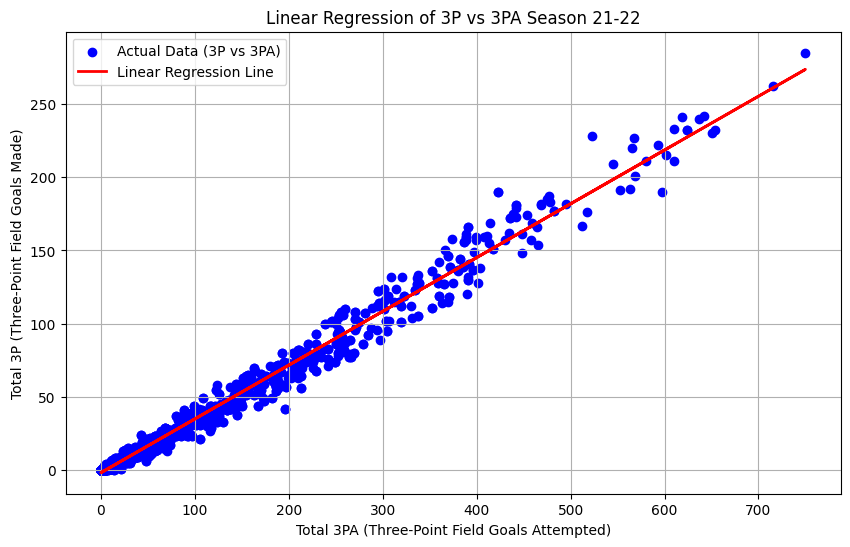

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load your specific data file for analysis (replace with your actual file)
data = pd.read_csv('/content/21-22.csv')  # Adjust the path as necessary

# Print column names to verify the structure of the CSV
print("Columns in the dataset:")
print(data.columns)

# Clean column names: strip spaces
data.columns = data.columns.str.strip()

# Print cleaned column names
print("Cleaned columns in the dataset:")
print(data.columns)

# Now check if '3P' and '3PA' are present in the data
if '3P' not in data.columns or '3PA' not in data.columns:
    print("Error: '3P' or '3PA' column not found in the dataset!")
else:
    # Convert columns to numeric and handle errors by coercing them to NaN
    data['3P'] = pd.to_numeric(data['3P'], errors='coerce')
    data['3PA'] = pd.to_numeric(data['3PA'], errors='coerce')

    # Drop rows with NaN values in '3P' or '3PA'
    data = data.dropna(subset=['3P', '3PA'])

    # Prepare points for regression
    Points = data['3P']
    PointsA = data['3PA']

    # Ensure the data is in the right format
    print("Points (3P):")
    print(Points.head())
    print("PointsA (3PA):")
    print(PointsA.head())

    # Perform linear regression
    X = PointsA.values.reshape(-1, 1)  # Reshape for sklearn
    y = Points.values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict values
    y_pred = model.predict(X)

    # Print coefficients
    print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')
    print(f'Linear Regression Intercept: {model.intercept_}')

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.scatter(PointsA, Points, color='blue', label='Actual Data (3P vs 3PA)')
    plt.plot(PointsA, y_pred, color='red', linewidth=2, label='Linear Regression Line')
    plt.xlabel('Total 3PA (Three-Point Field Goals Attempted)')
    plt.ylabel('Total 3P (Three-Point Field Goals Made)')
    plt.title('Linear Regression of 3P vs 3PA Season 21-22')
    plt.legend()
    plt.grid()
    plt.show()


In [ ]:
Points  = data['Unnamed: 11']

print(Points)


0       3P
1      200
2      262
3      245
4       40
      ... 
615      0
616      0
617      0
618      0
619    NaN
Name: Unnamed: 11, Length: 620, dtype: object


In [ ]:
data = pd.read_csv('/content/21-22.csv')
print(data)

       Rk          Player  Age Team  Pos    G   GS    MP   FG   FGA  ...  ORB  \
0       1      Trae Young   23  ATL   PG   76   76  2652  711  1544  ...   50   
1       2   DeMar DeRozan   32  CHI   PF   76   76  2743  774  1535  ...   56   
2       3     Joel Embiid   27  PHI    C   68   68  2297  666  1334  ...  146   
3       4    Jayson Tatum   23  BOS   SF   76   76  2731  708  1564  ...   85   
4       5    Nikola Jokić   26  DEN    C   74   74  2476  764  1311  ...  206   
...   ...             ...  ...  ...  ...  ...  ...   ...  ...   ...  ...  ...   
1557  602  Trayvon Palmer   27  DET   SG    1    0    17    0     1  ...    0   
1558  603   Emanuel Terry   25  PHO   PF    3    0    18    0     5  ...    8   
1559  604       Jon Teske   24  MEM    C    3    0     8    0     1  ...    0   
1560  605     M.J. Walker   23  PHO   SG    2    0     8    0     4  ...    0   
1561  NaN  League Average  NaN  NaN  NaN  NaN  NaN   NaN  NaN   NaN  ...  NaN   

      DRB   TRB  AST  STL  

In [ ]:
import pandas as pd


csv_file_path = '/content/16-17.csv'
csv_data = pd.read_csv(csv_file_path)  # Read the CSV into a DataFrame


#  Calculating the total of 3P and 3PA from each player of that season

total_3P = csv_data['3P'].sum()
total_3PA = csv_data['3PA'].sum()

# Display the results
print(f'Total 3P (Three-Point Field Goals Made): {total_3P}')
print(f'Total 3PA (Three-Point Field Goals Attempted): {total_3PA}')


Total 3P (Three-Point Field Goals Made): 26140.0
Total 3PA (Three-Point Field Goals Attempted): 73133.0


In [ ]:
import pandas as pd
import glob


csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Loop through each CSV file
for file in csv_files:
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files


    print(f'Processing file: {file}')

    # Check if the required columns exist
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Calculate totals for this file
        total_3P = csv_data['3P'].sum()
        total_3PA = csv_data['3PA'].sum()

        # Display the results for the current file
        print(f'Total 3P (Three-Point Field Goals Made): {total_3P}')
        print(f'Total 3PA (Three-Point Field Goals Attempted): {total_3PA}')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability


Processing file: /content/0-1.csv
/content/0-1.csv does not contain the required columns 3P and 3PA.
----------------------------------------
Processing file: /content/21-22.csv
/content/21-22.csv does not contain the required columns 3P and 3PA.
----------------------------------------
Processing file: /content/5-6.csv
/content/5-6.csv does not contain the required columns 3P and 3PA.
----------------------------------------
Processing file: /content/14-15.csv
/content/14-15.csv does not contain the required columns 3P and 3PA.
----------------------------------------
Processing file: /content/9-10.csv
/content/9-10.csv does not contain the required columns 3P and 3PA.
----------------------------------------
Processing file: /content/17-18.csv
Total 3P (Three-Point Field Goals Made): 28065.0
Total 3PA (Three-Point Field Goals Attempted): 77797.0
----------------------------------------
Processing file: /content/23-24.csv
/content/23-24.csv does not contain the required columns 3P and

Processing file: /content/0-1.csv
Total 3P (Three-Point Field Goals Made): 12087.0
Total 3PA (Three-Point Field Goals Attempted): 34290.0
----------------------------------------
Processing file: /content/21-22.csv
Total 3P (Three-Point Field Goals Made): 53724.0
Total 3PA (Three-Point Field Goals Attempted): 153411.0
----------------------------------------
Processing file: /content/22-23.csv
Total 3P (Three-Point Field Goals Made): 34490.0
Total 3PA (Three-Point Field Goals Attempted): 95472.0
----------------------------------------
Processing file: /content/5-6.csv
Total 3P (Three-Point Field Goals Made): 15325.0
Total 3PA (Three-Point Field Goals Attempted): 42898.0
----------------------------------------
Processing file: /content/14-15.csv
Total 3P (Three-Point Field Goals Made): 22080.0
Total 3PA (Three-Point Field Goals Attempted): 63420.0
----------------------------------------
Processing file: /content/9-10.csv
Total 3P (Three-Point Field Goals Made): 17336.0
Total 3PA (Thr

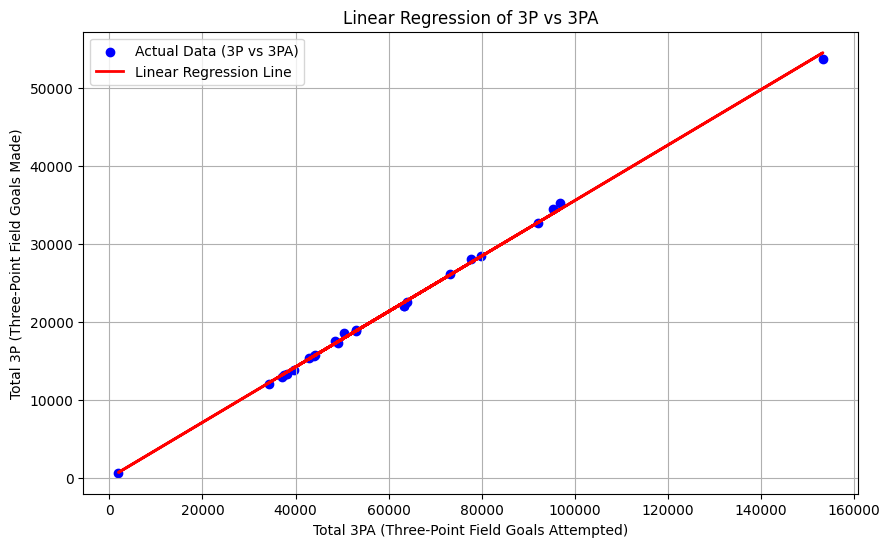

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the path to the folder containing the CSV files
csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Initialize lists to store the total 3P, 3PA, and corresponding seasons
totals = []

# Loop through each CSV file
for file in csv_files:
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files

    print(f'Processing file: {file}')

    # Check if the required columns exist
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Calculate totals for this file
        total_3P = csv_data['3P'].sum()
        total_3PA = csv_data['3PA'].sum()

        # Store the results with the filename (season name)
        totals.append((file, total_3P, total_3PA))

        # Display the results for the current file
        print(f'Total 3P (Three-Point Field Goals Made): {total_3P}')
        print(f'Total 3PA (Three-Point Field Goals Attempted): {total_3PA}')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability

# Convert the totals into a DataFrame for linear regression analysis
totals_df = pd.DataFrame(totals, columns=['Season', 'Total 3P', 'Total 3PA'])

# Prepare the data for linear regression
X = totals_df['Total 3PA'].values.reshape(-1, 1)  # Predictor variable (3PA)
y = totals_df['Total 3P'].values  # Response variable (3P)

# Create a linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict values
y_pred = model.predict(X)

# Print the linear regression coefficients
print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')
print(f'Linear Regression Intercept: {model.intercept_}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data (3P vs 3PA)')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Line')
plt.title('Linear Regression of 3P vs 3PA')
plt.xlabel('Total 3PA (Three-Point Field Goals Attempted)')
plt.ylabel('Total 3P (Three-Point Field Goals Made)')
plt.legend()
plt.grid()
plt.show()


Processing file: /content/23-24.csv
Total 3P (Three-Point Field Goals Made): 35290.0
Total 3PA (Three-Point Field Goals Attempted): 96744.0
----------------------------------------
Processing file: /content/9-10.csv
Total 3P (Three-Point Field Goals Made): 17336.0
Total 3PA (Three-Point Field Goals Attempted): 48965.0
----------------------------------------
Processing file: /content/11-12.csv
Total 3P (Three-Point Field Goals Made): 13325.0
Total 3PA (Three-Point Field Goals Attempted): 38111.0
----------------------------------------
Processing file: /content/5-6.csv
Total 3P (Three-Point Field Goals Made): 15325.0
Total 3PA (Three-Point Field Goals Attempted): 42714.0
----------------------------------------
Processing file: /content/12-13.csv
Total 3P (Three-Point Field Goals Made): 19002.0
Total 3PA (Three-Point Field Goals Attempted): 52742.0
----------------------------------------
Processing file: /content/0-1.csv
Total 3P (Three-Point Field Goals Made): 12087.0
Total 3PA (Thre

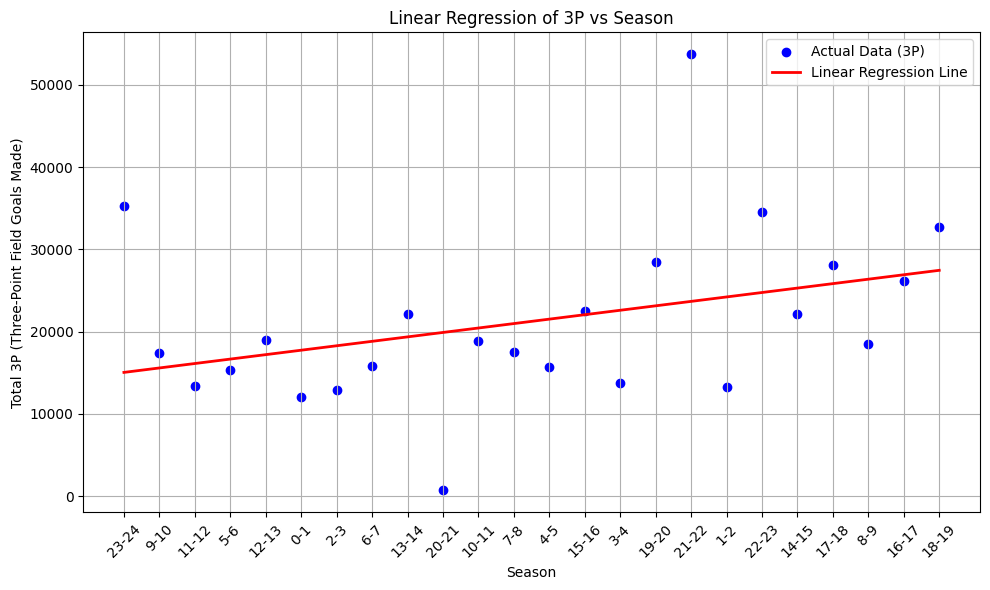

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the path to the folder containing the CSV files
csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Initialize lists to store the total 3P, 3PA, and corresponding seasons
totals = []
season_labels = []

# Loop through each CSV file
for idx, file in enumerate(csv_files):
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files

    # Extract the season from the file name (adjust based on your file naming)
    season = file.split('/')[-1].split('.')[0]
    season_labels.append(season)

    print(f'Processing file: {file}')

    # Check if the required columns exist (convert to uppercase for consistency)
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric and handle NaN values
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Drop rows where 3P or 3PA are NaN or 0
        valid_data = csv_data.dropna(subset=['3P', '3PA'])
        valid_data = valid_data[(valid_data['3P'] > 0) & (valid_data['3PA'] > 0)]

        if valid_data.empty:
            print(f'No valid data in {file} after removing NaN/zero values.')
            continue  # Skip files with no valid data

        # Calculate totals for this file
        total_3P = valid_data['3P'].sum()
        total_3PA = valid_data['3PA'].sum()

        # Store the results with the filename (season name)
        totals.append((idx, total_3P, total_3PA))

        # Display the results for the current file
        print(f'Total 3P (Three-Point Field Goals Made): {total_3P}')
        print(f'Total 3PA (Three-Point Field Goals Attempted): {total_3PA}')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability

# Check if totals is empty
if not totals:
    print("No valid data available for linear regression.")
else:
    # Convert the totals into a DataFrame for linear regression analysis
    totals_df = pd.DataFrame(totals, columns=['Season_Num', 'Total 3P', 'Total 3PA'])

    # Prepare the data for linear regression
    X = totals_df['Season_Num'].values.reshape(-1, 1)  # Predictor variable (Seasons as 0-1, 1-2, etc.)
    y = totals_df['Total 3P'].values  # Response variable (Total 3P)

    # Ensure we have data for regression
    if len(X) > 0 and len(y) > 0:
        # Create a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict values
        y_pred = model.predict(X)

        # Print the linear regression coefficients
        print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')
        print(f'Linear Regression Intercept: {model.intercept_}')

        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(totals_df['Season_Num'], totals_df['Total 3P'], color='blue', label='Actual Data (3P)')
        plt.plot(totals_df['Season_Num'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
        plt.xticks(totals_df['Season_Num'], season_labels, rotation=45)  # Replace x-ticks with season labels
        plt.title('Linear Regression of 3P vs Season')
        plt.xlabel('Season')
        plt.ylabel('Total 3P (Three-Point Field Goals Made)')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough valid data for linear regression.")


In [ ]:
lbl

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Processing file: /content/13-14.csv
Data from season 13-14 added.
----------------------------------------
Processing file: /content/1-2.csv
Data from season 1-2 added.
----------------------------------------
Processing file: /content/5-6.csv
Data from season 5-6 added.
----------------------------------------
Processing file: /content/23-24.csv
Data from season 23-24 added.
----------------------------------------
Processing file: /content/17-18.csv
Data from season 17-18 added.
----------------------------------------
Processing file: /content/2-3.csv
Data from season 2-3 added.
----------------------------------------
Processing file: /content/11-12.csv
Data from season 11-12 added.
----------------------------------------
Processing file: /content/21-22.csv
Data from season 21-22 added.
----------------------------------------
Processing file: /content/6-7.csv
Data from season 6-7 added.
----------------------------------------
Processing file: /content/15-16.csv
Data from season 

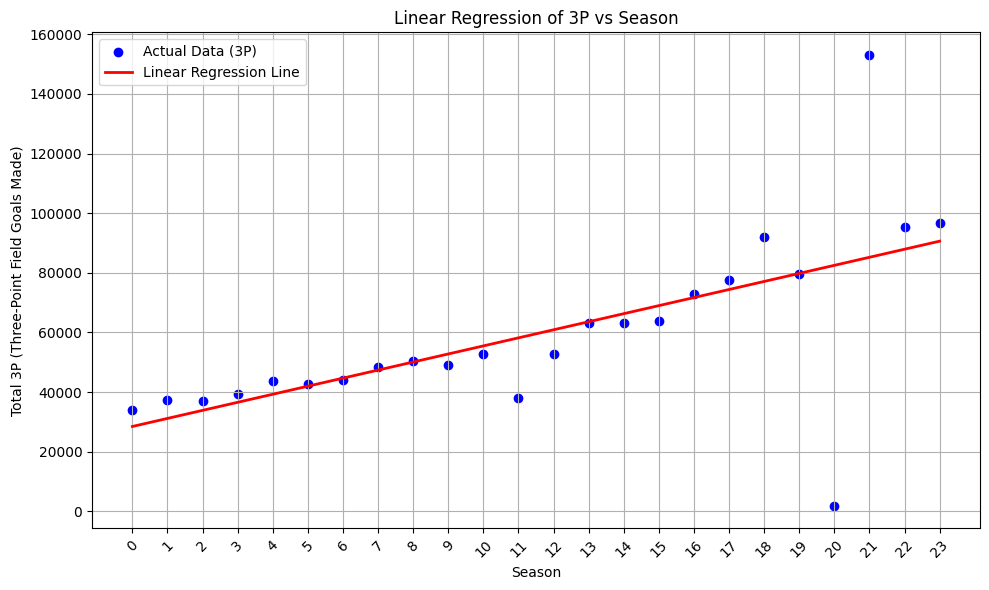

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the path to the folder containing the CSV files
csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Initialize a list to store all data
all_data = []

# Loop through each CSV file
for file in csv_files:
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files

    print(f'Processing file: {file}')

    # Extract the season number from the filename (assuming it is of the format "0-1.csv")
    season = file.split('/')[-1].split('.')[0]  # Get the filename without path and extension
    csv_data['Season'] = season  # Add the season column

    # Check if the required columns exist
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric and handle NaN values
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Drop rows where 3P or 3PA are NaN or 0
        valid_data = csv_data.dropna(subset=['3P', '3PA'])
        valid_data = valid_data[(valid_data['3P'] > 0) & (valid_data['3PA'] > 0)]

        if valid_data.empty:
            print(f'No valid data in {file} after removing NaN/zero values.')
            continue  # Skip files with no valid data

        # Append the valid data with the season column to the list
        all_data.append(valid_data)

        print(f'Data from season {season} added.')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability

# Concatenate all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Convert season strings to numeric values for regression (e.g., '0-1' to 0, '1-2' to 1, ...)
    combined_df['Season_Num'] = combined_df['Season'].str.split('-').str[0].astype(int)

    # Group by season and calculate the totals for 3P and 3PA
    season_totals = combined_df.groupby('Season_Num').agg({'3P': 'sum', '3PA': 'sum'}).reset_index()
    season_totals.columns = ['Season_Num', 'Total 3P', 'Total 3PA']

    # Prepare the data for linear regression
    X = season_totals['Season_Num'].values.reshape(-1, 1)  # Predictor variable (Seasons)
    y = season_totals['Total 3PA'].values  # Response variable (Total 3P)

    # Ensure we have data for regression
    if len(X) > 0 and len(y) > 0:
        # Create a linear regression model
        model = LinearRegression()
        model.fit(X, y)

        # Predict values
        y_pred = model.predict(X)

        # Print the linear regression coefficients
        print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')
        print(f'Linear Regression Intercept: {model.intercept_}')

        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(season_totals['Season_Num'], season_totals['Total 3PA'], color='blue', label='Actual Data (3P)')
        plt.plot(season_totals['Season_Num'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
        plt.xticks(season_totals['Season_Num'], rotation=45)  # Set x-ticks to numeric season numbers
        plt.title('Linear Regression of 3P vs Season')
        plt.xlabel('Season')
        plt.ylabel('Total 3P (Three-Point Field Goals Made)')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough valid data for linear regression.")
else:
    print("No valid data available for analysis.")


Processing file: /content/13-14.csv
Data from season 13-14 added.
----------------------------------------
Processing file: /content/1-2.csv
Data from season 1-2 added.
----------------------------------------
Processing file: /content/5-6.csv
Data from season 5-6 added.
----------------------------------------
Processing file: /content/23-24.csv
Data from season 23-24 added.
----------------------------------------
Processing file: /content/17-18.csv
Data from season 17-18 added.
----------------------------------------
Processing file: /content/2-3.csv
Data from season 2-3 added.
----------------------------------------
Processing file: /content/11-12.csv
Data from season 11-12 added.
----------------------------------------
Processing file: /content/21-22.csv
Data from season 21-22 added.
----------------------------------------
Processing file: /content/6-7.csv
Data from season 6-7 added.
----------------------------------------
Processing file: /content/15-16.csv
Data from season 

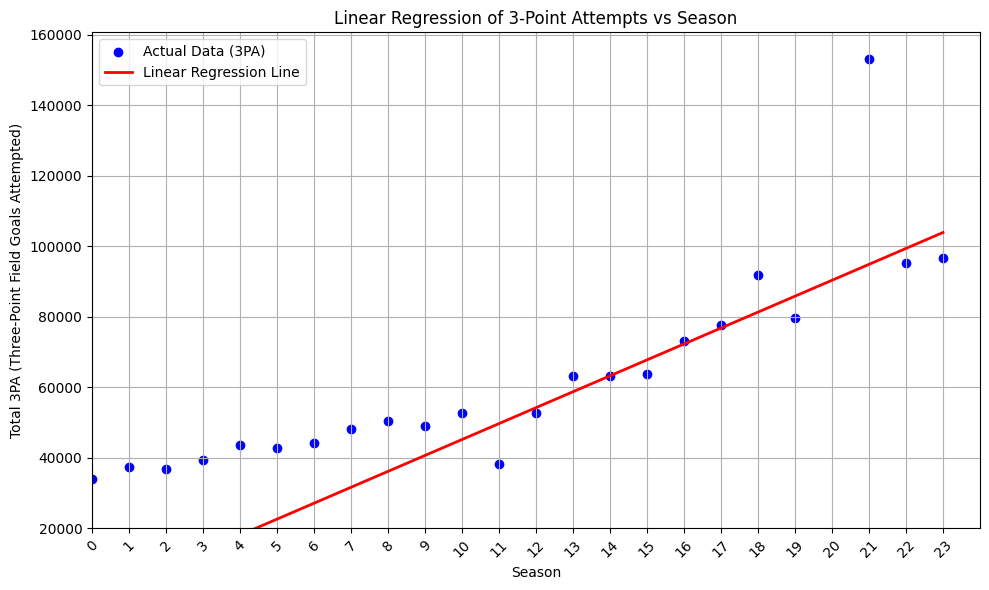

In [ ]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the path to the folder containing the CSV files
csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Initialize a list to store all data
all_data = []

# Loop through each CSV file
for file in csv_files:
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files

    print(f'Processing file: {file}')

    # Extract the season number from the filename (assuming it is of the format "0-1.csv")
    season = file.split('/')[-1].split('.')[0]  # Get the filename without path and extension
    csv_data['Season'] = season  # Add the season column

    # Check if the required columns exist
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric and handle NaN values
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Drop rows where 3P or 3PA are NaN or 0
        valid_data = csv_data.dropna(subset=['3P', '3PA'])
        valid_data = valid_data[(valid_data['3P'] > 0) & (valid_data['3PA'] > 0)]

        if valid_data.empty:
            print(f'No valid data in {file} after removing NaN/zero values.')
            continue  # Skip files with no valid data

        # Append the valid data with the season column to the list
        all_data.append(valid_data)

        print(f'Data from season {season} added.')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability

# Concatenate all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Convert season strings to numeric values for regression (e.g., '0-1' to 0, '1-2' to 1, ...)
    combined_df['Season_Num'] = combined_df['Season'].str.split('-').str[0].astype(int)

    # Group by season and calculate the totals for 3P and 3PA
    season_totals = combined_df.groupby('Season_Num').agg({'3P': 'sum', '3PA': 'sum'}).reset_index()
    season_totals.columns = ['Season_Num', 'Total 3P', 'Total 3PA']

    # Prepare the data for linear regression
    X = season_totals['Season_Num'].values.reshape(-1, 1)  # Predictor variable (Seasons)
    y = season_totals['Total 3PA'].values  # Response variable (Total 3PA)

    # Ensure we have data for regression
    if len(X) > 0 and len(y) > 0:
        # Create a linear regression model without intercept
        model = LinearRegression(fit_intercept=False)  # Set fit_intercept to False
        model.fit(X, y)

        # Predict values
        y_pred = model.predict(X)

        # Print the linear regression coefficients
        print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')

        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(season_totals['Season_Num'], season_totals['Total 3PA'], color='blue', label='Actual Data (3PA)')
        plt.plot(season_totals['Season_Num'], y_pred, color='red', linewidth=2, label='Linear Regression Line')
        plt.xlim(0, season_totals['Season_Num'].max() + 1)  # Ensure the x-axis starts from 0
        plt.ylim(20000,plt.ylim()[1])
        plt.xticks(season_totals['Season_Num'], rotation=45)  # Set x-ticks to numeric season numbers
        plt.title('Linear Regression of 3-Point Attempts vs Season')
        plt.xlabel('Season(From 2000-2023)')
        plt.ylabel('Total 3PA (Three-Point Field Goals Attempted)')
        plt.legend()
        plt.grid()
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough valid data for linear regression.")
else:
    print("No valid data available for analysis.")


Processing file: /content/23-24.csv
Data from season 23-24 added.
----------------------------------------
Processing file: /content/3-4.csv
Data from season 3-4 added.
----------------------------------------
Processing file: /content/22-23.csv
Data from season 22-23 added.
----------------------------------------
Processing file: /content/13-14.csv
Data from season 13-14 added.
----------------------------------------
Processing file: /content/20-21.csv
Data from season 20-21 added.
----------------------------------------
Processing file: /content/10-11.csv
Data from season 10-11 added.
----------------------------------------
Processing file: /content/7-8.csv
Data from season 7-8 added.
----------------------------------------
Processing file: /content/8-9.csv
Data from season 8-9 added.
----------------------------------------
Processing file: /content/12-13.csv
Data from season 12-13 added.
----------------------------------------
Processing file: /content/19-20.csv
Data from sea

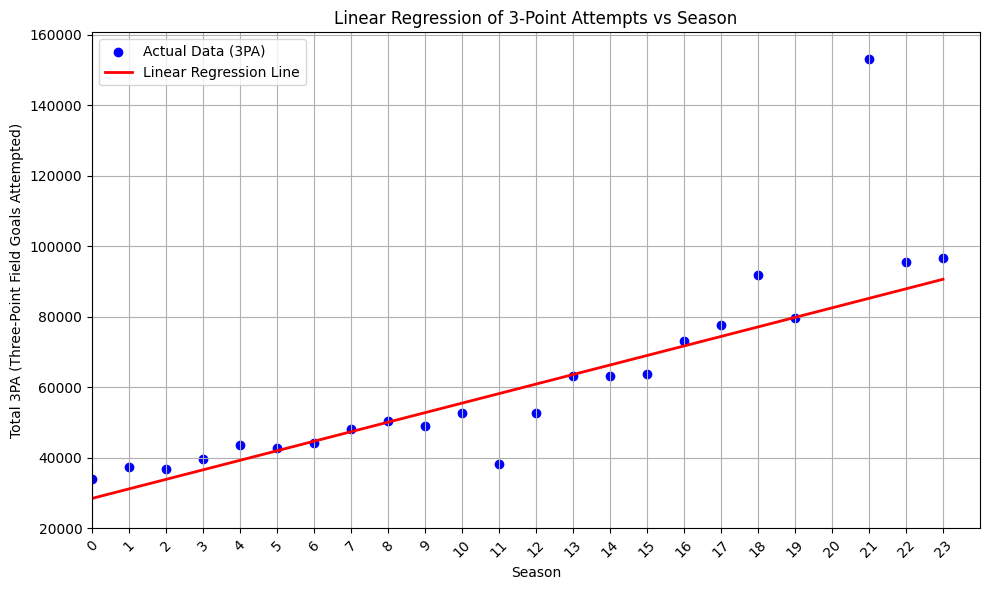

In [9]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the path to the folder containing the CSV files
csv_folder_path = '/content/'  # Adjust this path as needed

# Get a list of all CSV files in the folder
csv_files = glob.glob(csv_folder_path + '*.csv')

# Initialize a list to store all data
all_data = []

# Loop through each CSV file
for file in csv_files:
    csv_data = pd.read_csv(file)

    # Check if the DataFrame is empty
    if csv_data.empty:
        print(f'{file} is empty.')
        continue  # Skip empty files

    print(f'Processing file: {file}')

    # Extract the season number from the filename (assuming it is of the format "0-1.csv")
    season = file.split('/')[-1].split('.')[0]  # Get the filename without path and extension
    csv_data['Season'] = season  # Add the season column

    # Check if the required columns exist
    if '3P' in csv_data.columns and '3PA' in csv_data.columns:
        # Convert columns to numeric and handle NaN values
        csv_data['3P'] = pd.to_numeric(csv_data['3P'], errors='coerce')
        csv_data['3PA'] = pd.to_numeric(csv_data['3PA'], errors='coerce')

        # Drop rows where 3P or 3PA are NaN or 0
        valid_data = csv_data.dropna(subset=['3P', '3PA'])
        valid_data = valid_data[(valid_data['3P'] > 0) & (valid_data['3PA'] > 0)]

        if valid_data.empty:
            print(f'No valid data in {file} after removing NaN/zero values.')
            continue  # Skip files with no valid data

        # Append the valid data with the season column to the list
        all_data.append(valid_data)

        print(f'Data from season {season} added.')
    else:
        print(f'{file} does not contain the required columns 3P and 3PA.')

    print('-' * 40)  # Separator for better readability

# Concatenate all data into a single DataFrame
if all_data:
    combined_df = pd.concat(all_data, ignore_index=True)

    # Convert season strings to numeric values for regression (e.g., '0-1' to 0, '1-2' to 1, ...)
    combined_df['Season_Num'] = combined_df['Season'].str.split('-').str[0].astype(int)

    # Group by season and calculate the totals for 3P and 3PA
    season_totals = combined_df.groupby('Season_Num').agg({'3P': 'sum', '3PA': 'sum'}).reset_index()
    season_totals.columns = ['Season_Num', 'Total 3P', 'Total 3PA']

    # Prepare the data for linear regression
    X = season_totals['Season_Num'].values.reshape(-1, 1)  # Predictor variable (Seasons)
    y = season_totals['Total 3PA'].values  # Response variable (Total 3PA)

    # Ensure we have data for regression
    if len(X) > 0 and len(y) > 0:
        # Create a linear regression model with fit_intercept=True
        model = LinearRegression(fit_intercept=True)  # Changed to fit_intercept=True
        model.fit(X, y)  # Fit the model to the data

        # Generate x values for the fitted line
        xfit = np.linspace(season_totals['Season_Num'].min(), season_totals['Season_Num'].max(), 1000)  # Range for xfit
        yfit = model.predict(xfit[:, np.newaxis])  # Predict corresponding y values

        # Print the linear regression coefficients
        print(f'Linear Regression Coefficient (slope): {model.coef_[0]}')
        print(f'Linear Regression Intercept: {model.intercept_}')

        # Plotting the results
        plt.figure(figsize=(10, 6))
        plt.scatter(season_totals['Season_Num'], season_totals['Total 3PA'], color='blue', label='Actual Data (3PA)')
        plt.plot(xfit, yfit, color='red', linewidth=2, label='Linear Regression Line')  # Draw the fitted line
        plt.xlim(0, season_totals['Season_Num'].max() + 1)  # Ensure the x-axis starts from 0
        plt.ylim(20000, plt.ylim()[1])  # Set the lower limit of the y-axis to 20000
        plt.xticks(season_totals['Season_Num'], rotation=45)  # Set x-ticks to numeric season numbers
        plt.title('Linear Regression of 3-Point Attempts vs Season')
        plt.xlabel('Season')
        plt.ylabel('Total 3PA (Three-Point Field Goals Attempted)')
        plt.legend()  # Add legend
        plt.grid()  # Add grid lines
        plt.tight_layout()  # Adjust layout
        plt.show()  # Display the plot
    else:
        print("Not enough valid data for linear regression.")
else:
    print("No valid data available for analysis.")


In [10]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2701.747
Model intercept: 28468.880333333334


In [13]:


# Predict the target variable using the model
y_pred = model.predict(X)

# Calculate metrics
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 10398.16
Root Mean Squared Error (RMSE): 22423.59
R² Score: 0.41
